In [10]:
import numpy as np
from matplotlib import pyplot as plt
def clip(subjectPolygon, clipPolygon):
    def inside(p):
      return(cp2[0]-cp1[0])*(p[1]-cp1[1]) <= (cp2[1]-cp1[1])*(p[0]-cp1[0])

    def computeIntersection():
      dc = [ cp1[0] - cp2[0], cp1[1] - cp2[1] ]
      dp = [ s[0] - e[0], s[1] - e[1] ]
      n1 = cp1[0] * cp2[1] - cp1[1] * cp2[0]
      n2 = s[0] * e[1] - s[1] * e[0] 
      n3 = 1.0 / (dc[0] * dp[1] - dc[1] * dp[0])
      return [(n1*dp[0] - n2*dc[0]) * n3, (n1*dp[1] - n2*dc[1]) * n3]

    outputList = subjectPolygon
    cp1 = clipPolygon[-1]

    for clipVertex in clipPolygon:
      cp2 = clipVertex
      inputList = outputList
      outputList = []
      s = inputList[-1]

      for subjectVertex in inputList:
         e = subjectVertex
         if inside(e):
            if not inside(s):
               outputList.append(computeIntersection())
            outputList.append(e)
         elif inside(s):
            outputList.append(computeIntersection())
         s = e
      cp1 = cp2
    return outputList


[[100, 161], [100, 126], [158, 100], [180, 100], [180, 180]]


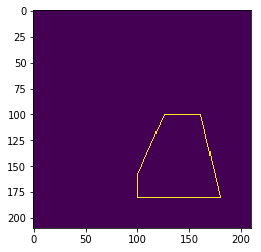

In [12]:
result = clip([[50,150],[180,90],[180,180]], [(100, 100), (100, 200), (200, 200), (200, 100)])
result = [[int(x), int(y)] for x,y in result]
print(result)

def draw_polygon(img, result):
    prev = result[-1]
    for cur in result:
        draw(img, lineDDA(prev[0], prev[1], cur[0], cur[1]))
        prev = cur

def draw(img, points):
    h, w = img.shape
    for x,y in points:
        if x < h and y < w and x >= 0 and y >= 0:
            img[x, y] = 1
    return img
 
def mround(n):
    if n == round(n):
        return round(n)
    if n*2 == round(n*2):
        return round(n + 0.5)
    else:
        return round(n)
    
def lineDDA(x1, y1, x2, y2):
    if x1 == x2 and y1 == y2:
        return [(x1, y1)]
    points = []
    x_start = x1
    y_start = y1
    x_end = x2
    y_end = y2
    delta_x = x_end - x_start
    delta_y = y_end - y_start
    L = max(abs(delta_x), abs(delta_y))
    x_step = delta_x / L
    y_step = delta_y / L
    x, y = x1, y1
    points.append((mround(x), mround(y)))
    for i in range(L):
        x = x + x_step
        y = y + y_step
        points.append((mround(x), mround(y)))
    return points

img = np.zeros((210, 210))
draw_polygon(img, result)
plt.imshow(img)